plots

In [2]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

def plot_some_data(train_images, train_labels, class_names):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]])
    plt.show()


def plot_some_predictions(test_images, test_labels, predictions, class_names, num_rows=5, num_cols=3):
    # Plot the first X test images, their predicted labels, and the true labels.
    # Color correct predictions in blue and incorrect predictions in red.   
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions[i], test_labels, class_names, test_images)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions[i], test_labels)
    plt.tight_layout()
    plt.show() 




def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

def plot_image(i, predictions_array, true_label, class_names, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


adam 400 epochs

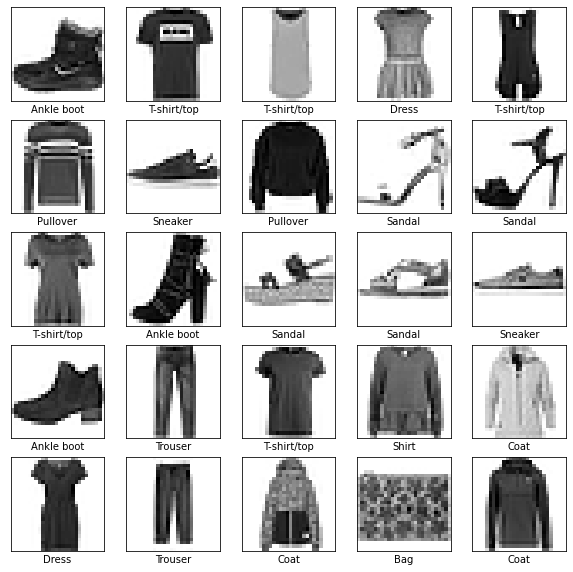

Epoch 1/400
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5022 - accuracy: 0.8207 - val_loss: 0.4447 - val_accuracy: 0.8419
Epoch 2/400
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3751 - accuracy: 0.8640 - val_loss: 0.3867 - val_accuracy: 0.8599
Epoch 3/400
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3391 - accuracy: 0.8752 - val_loss: 0.3872 - val_accuracy: 0.8619
Epoch 4/400
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3152 - accuracy: 0.8834 - val_loss: 0.3621 - val_accuracy: 0.8686
Epoch 5/400
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2989 - accuracy: 0.8897 - val_loss: 0.3478 - val_accuracy: 0.8764
Epoch 6/400
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2838 - accuracy: 0.8949 - val_loss: 0.3476 - val_accuracy: 0.8777
Epoch 7/400
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2714 - accuracy: 0.8991 - val_loss: 0.3672 - val_ac

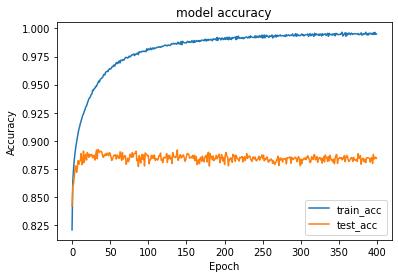

313/313 - 1s - loss: 1.8954 - accuracy: 0.8844 - 508ms/epoch - 2ms/step

Test accuracy: 0.8844000101089478


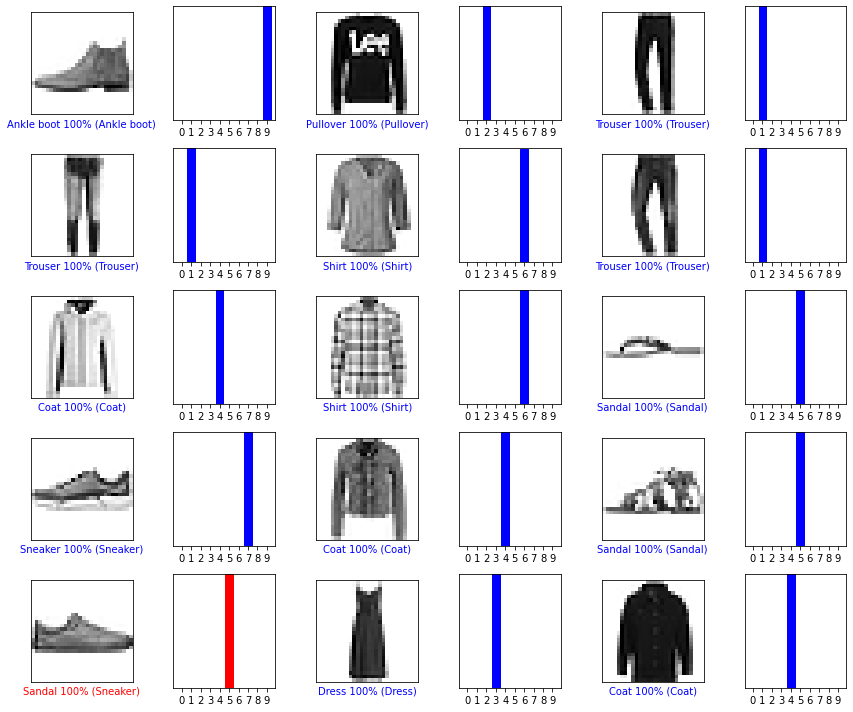

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#from plots import plot_some_data, plot_some_predictions


fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Scale these values to a range of 0 to 1 before feeding them to the neural network model. 
# To do so, divide the values by 255. 
# It's important that the training set and the testing set be preprocessed in the same way
train_images = train_images / 255.0

test_images = test_images / 255.0

plot_some_data(train_images, train_labels, class_names)

# Build the model
# Building the neural network requires configuring the layers of the model, then compiling the model.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Train the model
# Training the neural network model requires the following steps:

#   1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
#   2. The model learns to associate images and labels.
#   3. You ask the model to make predictions about a test set—in this example, the test_images array.
#   4. Verify that the predictions match the labels from the test_labels array.

history = model.fit(train_images, train_labels, epochs=400, validation_data=(test_images, test_labels))

# summarize history for accuracy
plt.plot(history.history['accuracy'], label = 'accurancy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train_acc', 'test_acc'], loc='lower right')
plt.show()

# Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

# Make predictions
# With the model trained, you can use it to make predictions about some images. 
# The model's linear outputs, logits. 
# Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

plot_some_predictions(test_images, test_labels, predictions, class_names, num_rows=5, num_cols=3)



adam 50 epochs

4431872/4422102 [==============================] - 0s 0us/step


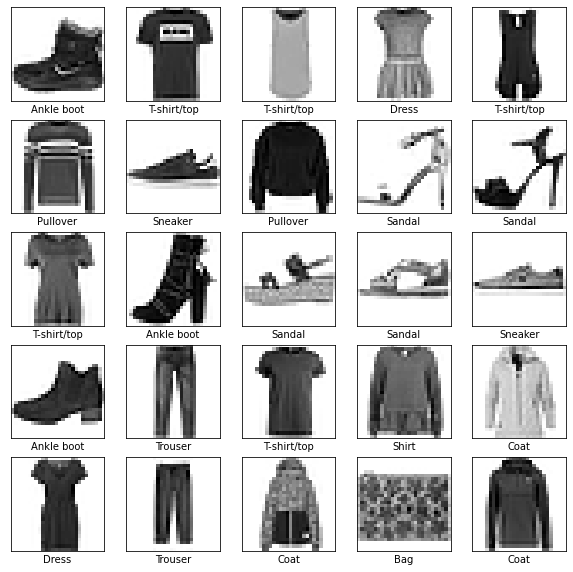

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4920 - accuracy: 0.8264 - val_loss: 0.4497 - val_accuracy: 0.8365
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3737 - accuracy: 0.8666 - val_loss: 0.3965 - val_accuracy: 0.8581
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3352 - accuracy: 0.8785 - val_loss: 0.3607 - val_accuracy: 0.8689
Epoch 4/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3102 - accuracy: 0.8860 - val_loss: 0.3572 - val_accuracy: 0.8733
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2920 - accuracy: 0.8918 - val_loss: 0.3378 - val_accuracy: 0.8805
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2782 - accuracy: 0.8976 - val_loss: 0.3553 - val_accuracy: 0.8732
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2671 - accuracy: 0.9015 - val_loss: 0.3347 - val_accuracy:

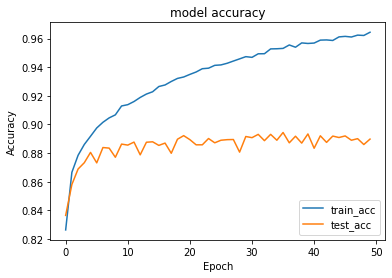

313/313 - 0s - loss: 0.5375 - accuracy: 0.8898 - 355ms/epoch - 1ms/step

Test accuracy: 0.8898000121116638


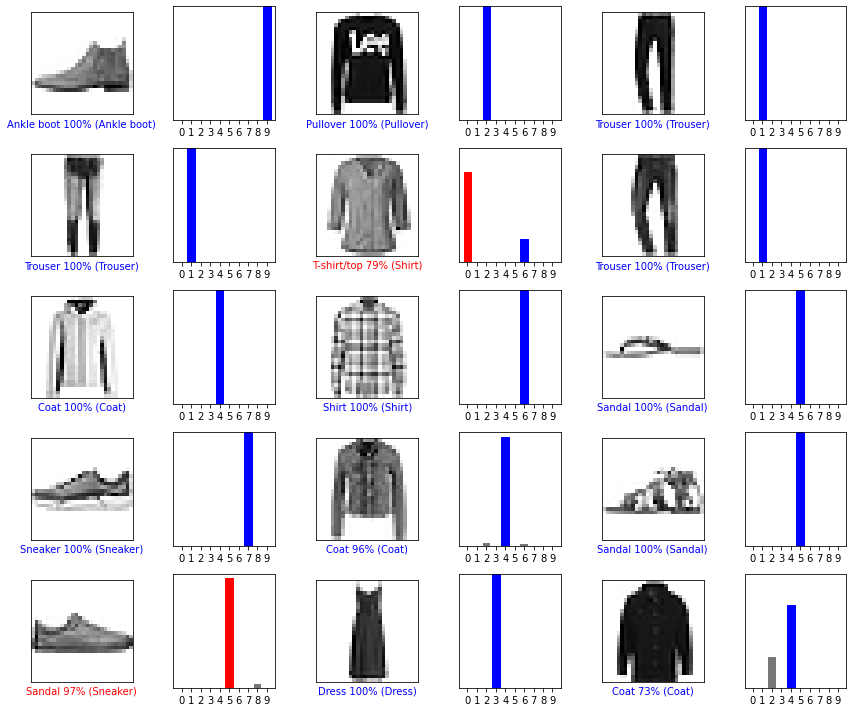

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#from plots import plot_some_data, plot_some_predictions


fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Scale these values to a range of 0 to 1 before feeding them to the neural network model. 
# To do so, divide the values by 255. 
# It's important that the training set and the testing set be preprocessed in the same way
train_images = train_images / 255.0

test_images = test_images / 255.0

plot_some_data(train_images, train_labels, class_names)

# Build the model
# Building the neural network requires configuring the layers of the model, then compiling the model.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Train the model
# Training the neural network model requires the following steps:

#   1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
#   2. The model learns to associate images and labels.
#   3. You ask the model to make predictions about a test set—in this example, the test_images array.
#   4. Verify that the predictions match the labels from the test_labels array.

history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels))

# summarize history for accuracy
plt.plot(history.history['accuracy'], label = 'accurancy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train_acc', 'test_acc'], loc='lower right')
plt.show()

# Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

# Make predictions
# With the model trained, you can use it to make predictions about some images. 
# The model's linear outputs, logits. 
# Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

plot_some_predictions(test_images, test_labels, predictions, class_names, num_rows=5, num_cols=3)



sgd 50 epochs

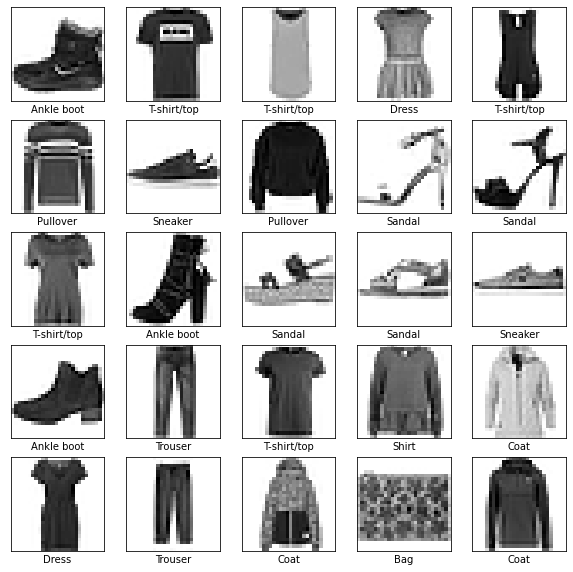

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7481 - accuracy: 0.7580 - val_loss: 0.5685 - val_accuracy: 0.8087
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5146 - accuracy: 0.8263 - val_loss: 0.5181 - val_accuracy: 0.8190
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4698 - accuracy: 0.8392 - val_loss: 0.4903 - val_accuracy: 0.8318
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4443 - accuracy: 0.8478 - val_loss: 0.4724 - val_accuracy: 0.8331
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4256 - accuracy: 0.8530 - val_loss: 0.4475 - val_accuracy: 0.8435
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4115 - accuracy: 0.8571 - val_loss: 0.4357 - val_accuracy: 0.8455
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4002 - accuracy: 0.8605 - val_loss: 0.4395 - val_accuracy:

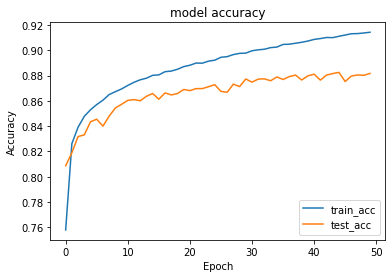

313/313 - 0s - loss: 0.3330 - accuracy: 0.8817 - 347ms/epoch - 1ms/step

Test accuracy: 0.8816999793052673


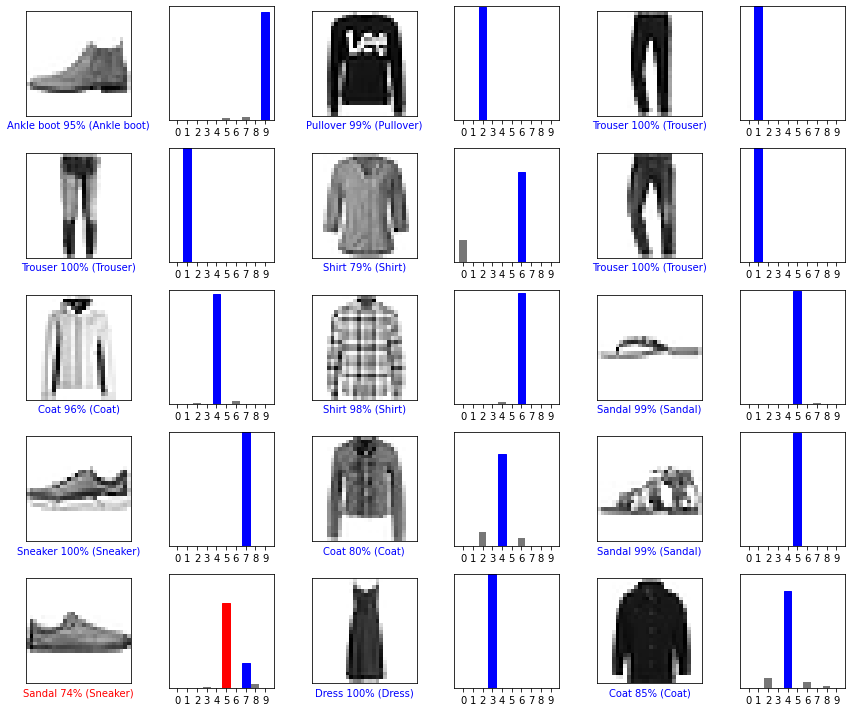

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#from plots import plot_some_data, plot_some_predictions


fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Scale these values to a range of 0 to 1 before feeding them to the neural network model. 
# To do so, divide the values by 255. 
# It's important that the training set and the testing set be preprocessed in the same way
train_images = train_images / 255.0

test_images = test_images / 255.0

plot_some_data(train_images, train_labels, class_names)

# Build the model
# Building the neural network requires configuring the layers of the model, then compiling the model.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])


model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Train the model
# Training the neural network model requires the following steps:

#   1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
#   2. The model learns to associate images and labels.
#   3. You ask the model to make predictions about a test set—in this example, the test_images array.
#   4. Verify that the predictions match the labels from the test_labels array.

history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels))

# summarize history for accuracy
plt.plot(history.history['accuracy'], label = 'accurancy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train_acc', 'test_acc'], loc='lower right')
plt.show()

# Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

# Make predictions
# With the model trained, you can use it to make predictions about some images. 
# The model's linear outputs, logits. 
# Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

plot_some_predictions(test_images, test_labels, predictions, class_names, num_rows=5, num_cols=3)


 rmsprop 50 epochs

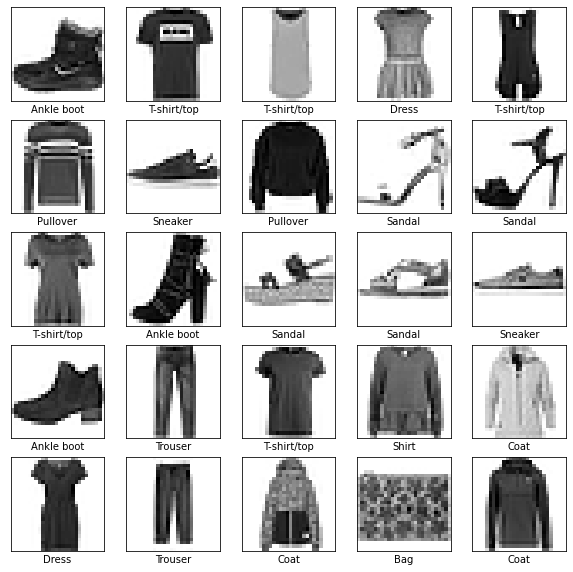

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5078 - accuracy: 0.8193 - val_loss: 0.4312 - val_accuracy: 0.8469
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3794 - accuracy: 0.8638 - val_loss: 0.4168 - val_accuracy: 0.8550
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3482 - accuracy: 0.8756 - val_loss: 0.4045 - val_accuracy: 0.8656
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3286 - accuracy: 0.8839 - val_loss: 0.3778 - val_accuracy: 0.8690
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3163 - accuracy: 0.8903 - val_loss: 0.4304 - val_accuracy: 0.8582
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3098 - accuracy: 0.8928 - val_loss: 0.3805 - val_accuracy: 0.8710
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3002 - accuracy: 0.8957 - val_loss: 0.3961 - val_accuracy:

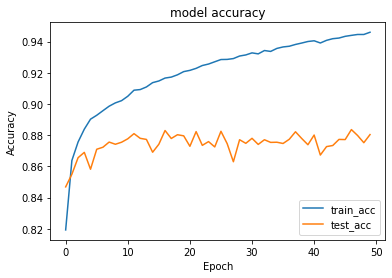

313/313 - 0s - loss: 0.7546 - accuracy: 0.8804 - 358ms/epoch - 1ms/step

Test accuracy: 0.8804000020027161


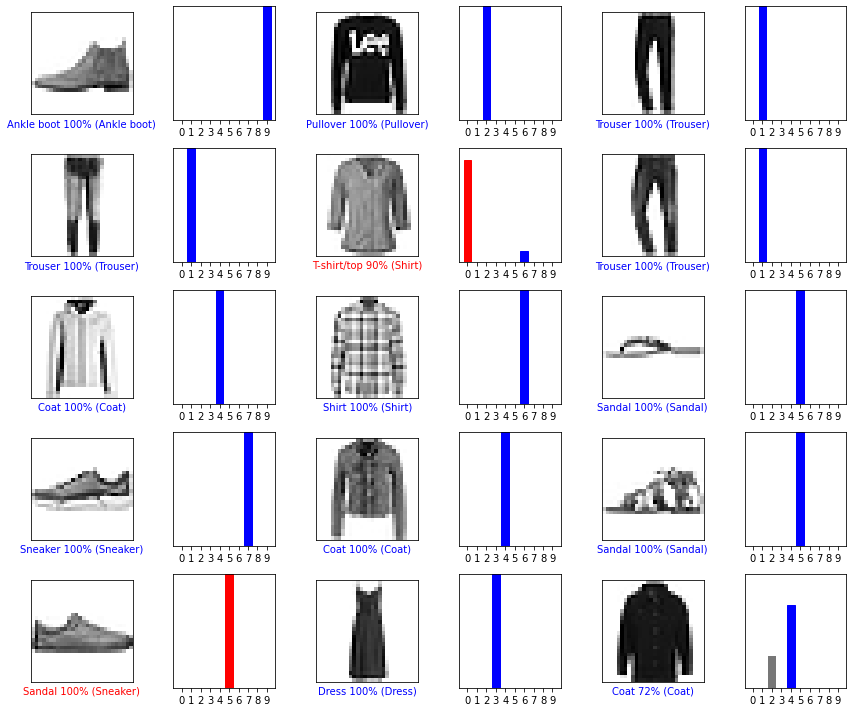

In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#from plots import plot_some_data, plot_some_predictions


fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Scale these values to a range of 0 to 1 before feeding them to the neural network model. 
# To do so, divide the values by 255. 
# It's important that the training set and the testing set be preprocessed in the same way
train_images = train_images / 255.0

test_images = test_images / 255.0

plot_some_data(train_images, train_labels, class_names)

# Build the model
# Building the neural network requires configuring the layers of the model, then compiling the model.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])


model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Train the model
# Training the neural network model requires the following steps:

#   1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
#   2. The model learns to associate images and labels.
#   3. You ask the model to make predictions about a test set—in this example, the test_images array.
#   4. Verify that the predictions match the labels from the test_labels array.

history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels))

# summarize history for accuracy
plt.plot(history.history['accuracy'], label = 'accurancy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train_acc', 'test_acc'], loc='lower right')
plt.show()

# Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

# Make predictions
# With the model trained, you can use it to make predictions about some images. 
# The model's linear outputs, logits. 
# Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

plot_some_predictions(test_images, test_labels, predictions, class_names, num_rows=5, num_cols=3)


nadam 50 epochs

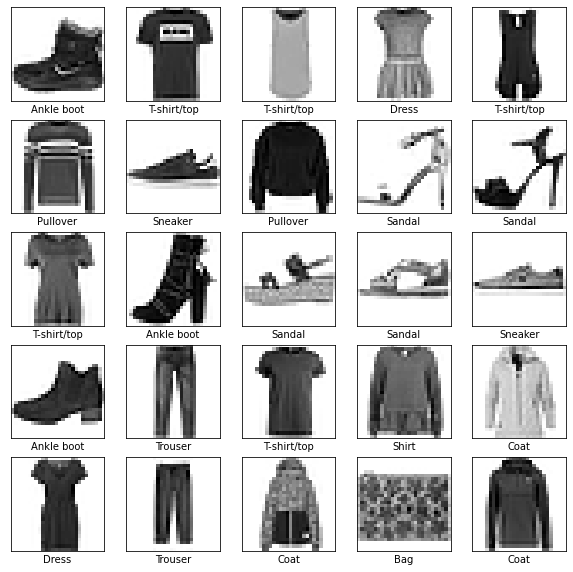

Epoch 1/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4876 - accuracy: 0.8292 - val_loss: 0.4087 - val_accuracy: 0.8554
Epoch 2/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3641 - accuracy: 0.8690 - val_loss: 0.3897 - val_accuracy: 0.8584
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3279 - accuracy: 0.8809 - val_loss: 0.3626 - val_accuracy: 0.8697
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3061 - accuracy: 0.8868 - val_loss: 0.3411 - val_accuracy: 0.8755
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2873 - accuracy: 0.8937 - val_loss: 0.3400 - val_accuracy: 0.8747
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2739 - accuracy: 0.8981 - val_loss: 0.3387 - val_accuracy: 0.8788
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2624 - accuracy: 0.9023 - val_loss: 0.3427 - val_accuracy:

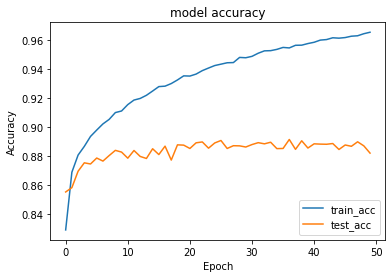

313/313 - 0s - loss: 0.5176 - accuracy: 0.8822 - 352ms/epoch - 1ms/step

Test accuracy: 0.8822000026702881


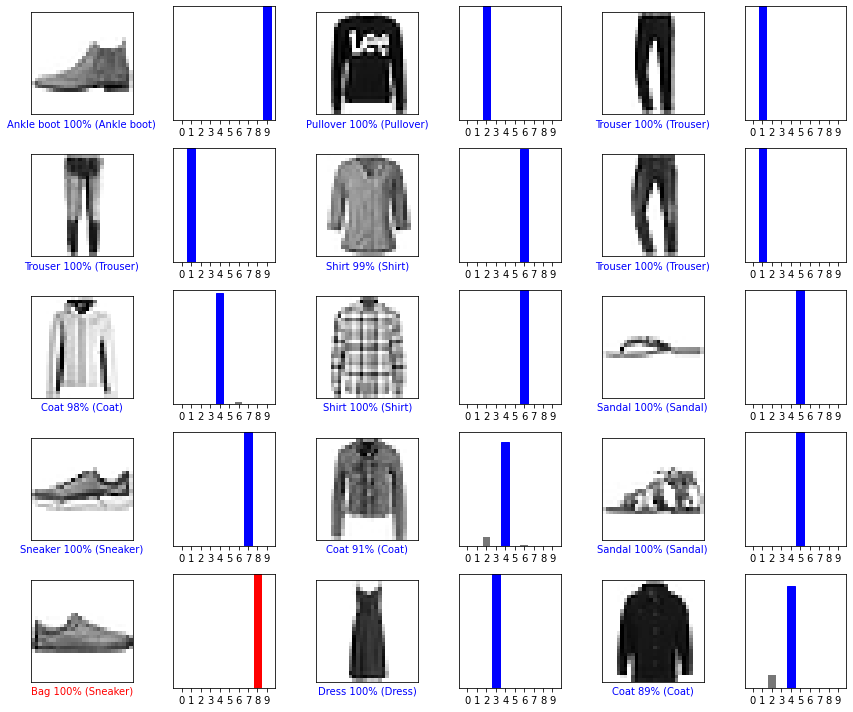

In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#from plots import plot_some_data, plot_some_predictions


fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Scale these values to a range of 0 to 1 before feeding them to the neural network model. 
# To do so, divide the values by 255. 
# It's important that the training set and the testing set be preprocessed in the same way
train_images = train_images / 255.0

test_images = test_images / 255.0

plot_some_data(train_images, train_labels, class_names)

# Build the model
# Building the neural network requires configuring the layers of the model, then compiling the model.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])


model.compile(optimizer='nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Train the model
# Training the neural network model requires the following steps:

#   1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
#   2. The model learns to associate images and labels.
#   3. You ask the model to make predictions about a test set—in this example, the test_images array.
#   4. Verify that the predictions match the labels from the test_labels array.

history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels))

# summarize history for accuracy
plt.plot(history.history['accuracy'], label = 'accurancy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train_acc', 'test_acc'], loc='lower right')
plt.show()

# Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

# Make predictions
# With the model trained, you can use it to make predictions about some images. 
# The model's linear outputs, logits. 
# Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

plot_some_predictions(test_images, test_labels, predictions, class_names, num_rows=5, num_cols=3)


adamax 50 epochs

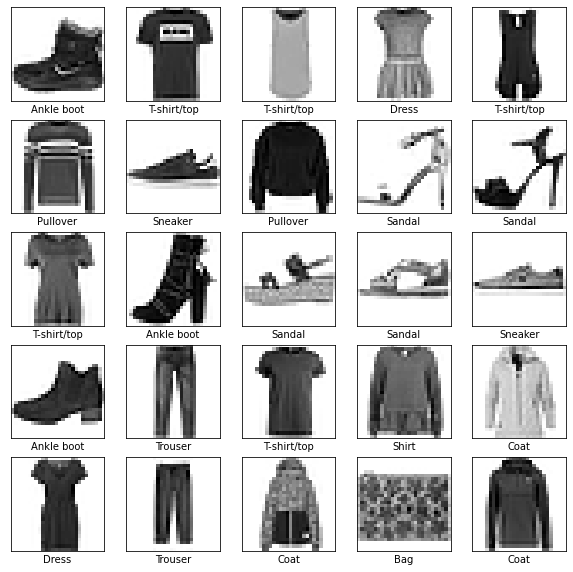

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5612 - accuracy: 0.8086 - val_loss: 0.4712 - val_accuracy: 0.8352
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4234 - accuracy: 0.8520 - val_loss: 0.4522 - val_accuracy: 0.8382
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3854 - accuracy: 0.8641 - val_loss: 0.4231 - val_accuracy: 0.8532
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3600 - accuracy: 0.8722 - val_loss: 0.4023 - val_accuracy: 0.8532
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3413 - accuracy: 0.8795 - val_loss: 0.3706 - val_accuracy: 0.8714
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3261 - accuracy: 0.8837 - val_loss: 0.3723 - val_accuracy: 0.8664
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3152 - accuracy: 0.8864 - val_loss: 0.3580 - val_accuracy:

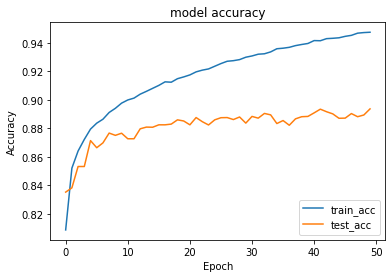

313/313 - 0s - loss: 0.3295 - accuracy: 0.8937 - 348ms/epoch - 1ms/step

Test accuracy: 0.8937000036239624


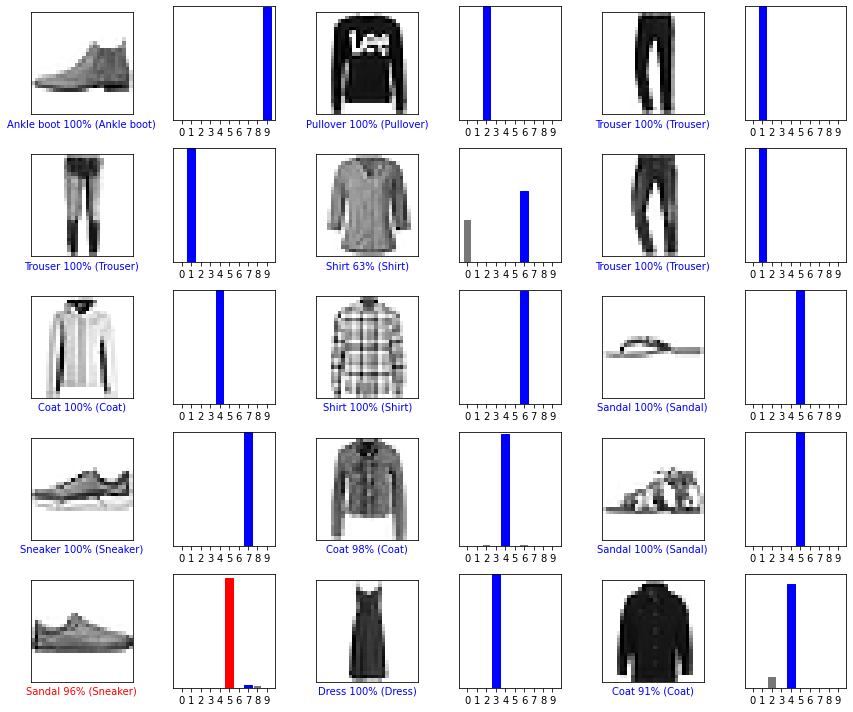

In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#from plots import plot_some_data, plot_some_predictions


fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Scale these values to a range of 0 to 1 before feeding them to the neural network model. 
# To do so, divide the values by 255. 
# It's important that the training set and the testing set be preprocessed in the same way
train_images = train_images / 255.0

test_images = test_images / 255.0

plot_some_data(train_images, train_labels, class_names)

# Build the model
# Building the neural network requires configuring the layers of the model, then compiling the model.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])


model.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Train the model
# Training the neural network model requires the following steps:

#   1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
#   2. The model learns to associate images and labels.
#   3. You ask the model to make predictions about a test set—in this example, the test_images array.
#   4. Verify that the predictions match the labels from the test_labels array.

history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels))

# summarize history for accuracy
plt.plot(history.history['accuracy'], label = 'accurancy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train_acc', 'test_acc'], loc='lower right')
plt.show()

# Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

# Make predictions
# With the model trained, you can use it to make predictions about some images. 
# The model's linear outputs, logits. 
# Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

plot_some_predictions(test_images, test_labels, predictions, class_names, num_rows=5, num_cols=3)


ftrl 50 epochs

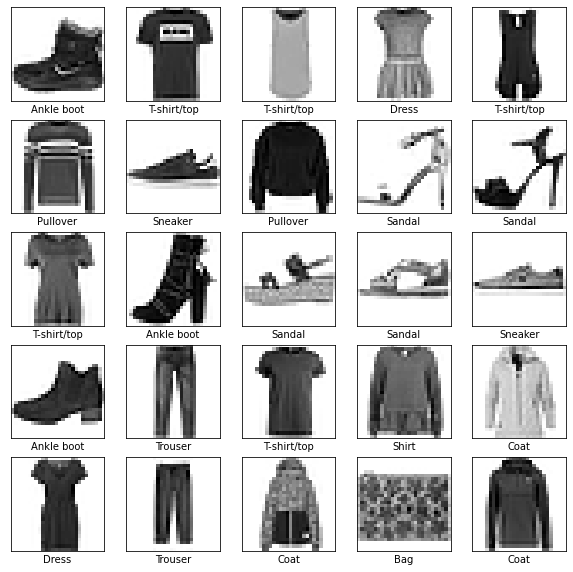

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2245 - accuracy: 0.1960 - val_loss: 1.9834 - val_accuracy: 0.2818
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6859 - accuracy: 0.3978 - val_loss: 1.4880 - val_accuracy: 0.4436
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3704 - accuracy: 0.4991 - val_loss: 1.2784 - val_accuracy: 0.5657
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1897 - accuracy: 0.6036 - val_loss: 1.1221 - val_accuracy: 0.6161
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0528 - accuracy: 0.6369 - val_loss: 1.0099 - val_accuracy: 0.6358
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9600 - accuracy: 0.6521 - val_loss: 0.9373 - val_accuracy: 0.6481
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8993 - accuracy: 0.6631 - val_loss: 0.8883 - val_accuracy:

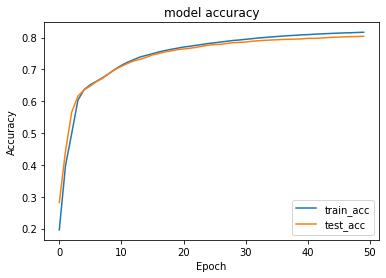

313/313 - 0s - loss: 0.5572 - accuracy: 0.8042 - 365ms/epoch - 1ms/step

Test accuracy: 0.8041999936103821


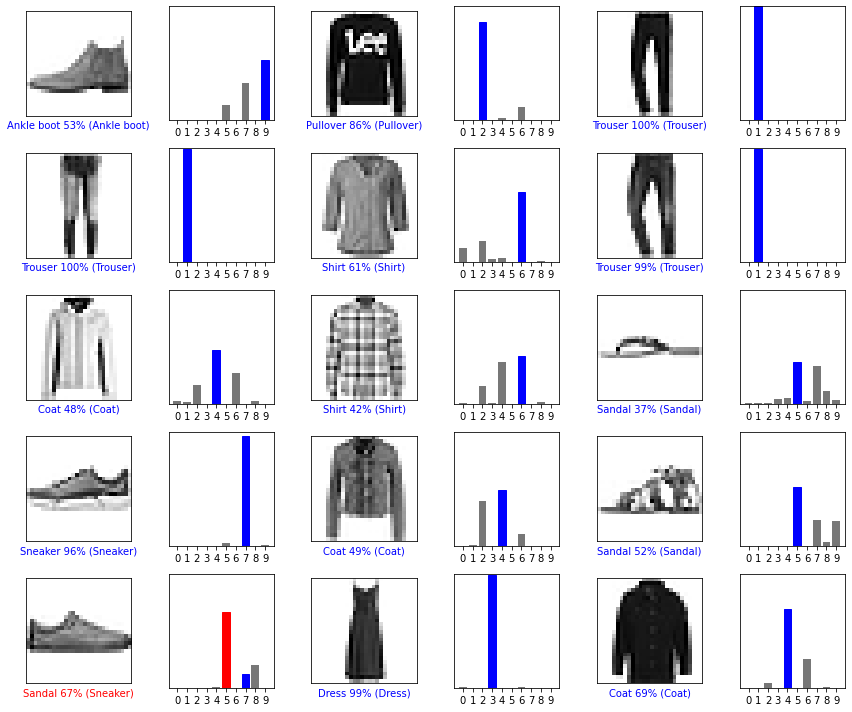

In [8]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#from plots import plot_some_data, plot_some_predictions


fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Scale these values to a range of 0 to 1 before feeding them to the neural network model. 
# To do so, divide the values by 255. 
# It's important that the training set and the testing set be preprocessed in the same way
train_images = train_images / 255.0

test_images = test_images / 255.0

plot_some_data(train_images, train_labels, class_names)

# Build the model
# Building the neural network requires configuring the layers of the model, then compiling the model.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])


model.compile(optimizer='ftrl',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Train the model
# Training the neural network model requires the following steps:

#   1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
#   2. The model learns to associate images and labels.
#   3. You ask the model to make predictions about a test set—in this example, the test_images array.
#   4. Verify that the predictions match the labels from the test_labels array.

history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels))

# summarize history for accuracy
plt.plot(history.history['accuracy'], label = 'accurancy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train_acc', 'test_acc'], loc='lower right')
plt.show()

# Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

# Make predictions
# With the model trained, you can use it to make predictions about some images. 
# The model's linear outputs, logits. 
# Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

plot_some_predictions(test_images, test_labels, predictions, class_names, num_rows=5, num_cols=3)
